In [2]:
import alpdesign
import numpy as np
import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

[[ 0.36478954]
 [ 1.03147386]
 [ 0.60378958]
 [10.42794919]
 [ 7.00647491]
 [ 6.90584331]
 [12.49089692]
 [11.29589671]
 [ 2.33968462]
 [12.05063368]
 [ 8.93105419]
 [ 0.70442118]
 [ 7.64800133]
 [ 0.44026323]
 [11.23300196]
 [ 6.05047474]
 [ 4.91836928]
 [ 2.69189521]
 [ 4.98126403]
 [ 0.22642109]
 [ 8.30210671]
 [ 8.90589629]
 [ 2.72963206]
 [ 3.68563222]
 [ 8.22663301]
 [12.06321263]
 [ 8.36500146]
 [12.39026532]
 [ 4.62905344]
 [ 3.61015852]
 [ 2.17615827]
 [ 5.43410621]]


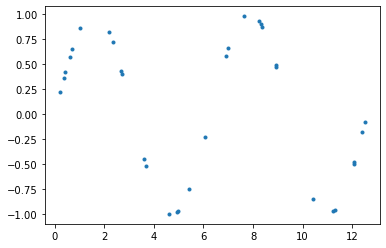

In [5]:
N = 32
x = np.linspace(0,4 * np.pi, 1000)
reps = x[np.random.randint(0,1000, size=N)].reshape(-1, 1)
labels = np.sin(reps)
plt.plot(reps, labels, '.')
print(reps)

In [6]:
key = jax.random.PRNGKey(0)
forward_t = hk.without_apply_rng(hk.transform(alpdesign.model_forward))
params, losses = alpdesign.ensemble_train(
    key, forward_t, reps, labels, epochs=500)

/home/ziyue/miniconda3/envs/alpdesign/lib/python3.7/site-packages/jax/_src/numpy/lax_numpy.py:3132: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "zeros")


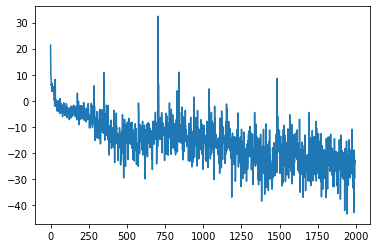

In [7]:
plt.plot(losses[5:])

In [8]:
forward = partial(forward_t.apply, params)
yhat_mu, yhat_std = [], []
for xi in x:
    v = alpdesign.model_reduce(forward(np.tile(xi, 5).reshape(-1, 1, 1)))
    yhat_mu.append(float(v[0]))
    yhat_std.append(float(v[1]))

(-1.0, 1.0)

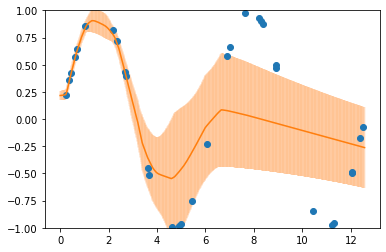

In [9]:
plt.plot(np.squeeze(reps), np.squeeze(labels), 'o')
plt.plot(x, yhat_mu, color='C1')
plt.errorbar(x, yhat_mu, yerr=yhat_std, color='C1', alpha=0.1)
plt.ylim(-1,1)